# K-Means Clustering for Crimes Data Set Using Python

Many U.S. cities, the U.S. federal government, and even other cities and governments abroad have started subscribing to an Open Data policy, because some data should be transparent and available to everyone to use and republish freely, without restrictions from copyright, patents, or other mechanisms of control. After reading their terms of use, in this lab you'll be exploring the City of Chicago's Crime data set, which is part of their Open Data initiative.

Start by navigating over to the City of Chicago's Crimes dataset exploration page. It lists crimes from 2001 to the present, but you'll only be targeting Gambling. The city's website itself has hundreds of other datasets you can browse and do machine learning on.

Fill out the doKMeans method to find and plot seven clusters and print out their centroids. These could be places a police officer investigates to check for on-going illegal activities.

Start by importing whatever you need to import in order to make this lab work:

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [2]:
df = pd.read_csv('Datasets\Crimes.csv')
df.shape

(14234, 22)

Get rid of any _rows_ that have nans in them:

In [3]:
df = df.dropna(axis=0)
df.shape

(13021, 22)

Display the `dtypes` of your dset:

In [4]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [5]:
df.Date = pd.to_datetime(df.Date)
df.dtypes
df.shape

(13021, 22)

In [6]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df[['Latitude', 'Longitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    model = KMeans(n_clusters=7)
    model.fit(df)
    
      
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10, n_jobs=1,
          precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,1], centroids[:,0], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[ 41.89343087 -87.75689821]
 [ 41.80346598 -87.6195112 ]
 [ 41.77272835 -87.66471692]
 [ 41.69664745 -87.63108338]
 [ 41.75256823 -87.58253297]
 [ 41.87812829 -87.70962835]
 [ 41.9817429  -87.68505137]]


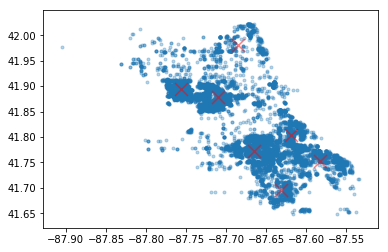

In [7]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [8]:
df = df[df.Date > '2011-01-01']
df.shape

(3147, 22)

[[ 41.8753895  -87.71065247]
 [ 41.70559452 -87.63498384]
 [ 41.8900059  -87.75484509]
 [ 41.77567273 -87.6647826 ]
 [ 41.75033989 -87.57999513]
 [ 41.98350221 -87.68715349]
 [ 41.79210152 -87.61888255]]


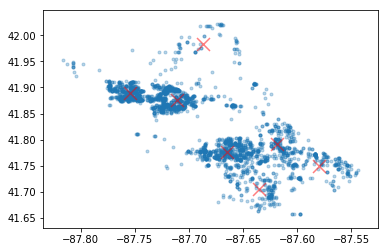

In [9]:
# Print & Plot your data
doKMeans(df)

### Conclusion

The 7 coordinates above denote the central points, or centroids, of the seven clusters. These could be places a police officer investigates to check for on-going illegal gambling activities in the City of Chicago.